**Author**: CodeForAll  
**License**: MIT License

---


# Nyquist Plot

### **What is a Nyquist Plot?**
A **Nyquist Plot** is a graphical representation of the frequency response of a system. It is a plot of the complex transfer function $ G(j\omega) = \frac{Y(j\omega)}{U(j\omega)} $ in the complex plane, where $ \omega $ is the frequency and $ j $ is the imaginary unit.

The plot shows how the system responds to sinusoidal inputs across a range of frequencies, and it is particularly useful for analyzing system stability, especially for systems with feedback.

### **Nyquist Criterion**
The **Nyquist Criterion** is a graphical method for determining the stability of a closed-loop system based on its open-loop transfer function. The criterion uses the Nyquist plot of the open-loop transfer function $ G(s)H(s) $ to assess how many times the plot encircles the critical point $ -1 $ in the complex plane.

#### **Key Concepts in Nyquist Plot:**
1. **Encirclements of -1:**
   - The stability of the closed-loop system depends on the number of times the Nyquist plot encircles the point $ -1 $ in the complex plane.
   - If the Nyquist plot encircles $ -1 $ **clockwise**, the system is **unstable**.
   - If it does not encircle $ -1 $, the system is **stable**.

2. **Open-Loop Transfer Function:**
   The Nyquist plot is constructed for the **open-loop transfer function** $ G(s)H(s) $ of the system.

3. **Poles and Zeros:**
   - **Poles** of the open-loop transfer function are critical in determining the shape and behavior of the Nyquist plot.
   - If the open-loop system has poles in the right-half of the complex plane (RHP), the plot will encircle the critical point $ -1 $.

4. **Critical Point (-1):**
   The point $ -1 $ is a critical point in the complex plane. If the Nyquist plot crosses or encircles this point, the system's stability is compromised.

### **How to Use Nyquist Plot to Determine Stability:**
1. **Poles and Zeros:**
   - If the system has **poles in the right-half-plane (RHP)**, the Nyquist plot may encircle the critical point $ -1 $.
   - **Zeros** do not affect the encirclements directly but can influence the plot's shape.

2. **Stability Condition:**
   Using the Nyquist criterion, the stability of the system is determined by the formula:

   $$
   Z = P - N
   $$

   Where:
   - $ Z $ is the number of zeros of the closed-loop transfer function in the right-half-plane.
   - $ P $ is the number of poles of the open-loop transfer function in the right-half-plane.
   - $ N $ is the number of encirclements of $ -1 $ in the Nyquist plot.

   If $ N = 0 $, the system is stable. If $ N \neq 0 $, the system is unstable.

### **Example of Nyquist Plot Analysis:**

#### **Stable System Example:**
For a transfer function $ G(s) = \frac{1}{s+2} $, the Nyquist plot will show no encirclements around $ -1 $, indicating a stable system.

#### **Unstable System Example:**
For a transfer function $ G(s) = \frac{6(s+1)}{(s-1)(s-2)} $, the Nyquist plot will show encirclements around $ -1 $, indicating that the system is unstable.

### **Steps to Plot a Nyquist Plot:**
1. Define the system's open-loop transfer function $ G(s)H(s) $.
2. Generate a range of frequencies ($ \omega $) over which the system will be evaluated.
3. Plot $ G(j\omega) = \frac{Y(j\omega)}{U(j\omega)} $ in the complex plane for each frequency.
4. Analyze the plot for any encirclements of the critical point $ -1 $.

### **Practical Applications of Nyquist Plots:**
- **Stability Analysis:** Nyquist plots are widely used in control systems to determine the stability of systems, especially when feedback is involved.
- **Bode Plot Comparison:** Nyquist plots can be used in conjunction with Bode plots to give a more complete understanding of system behavior.
- **System Design:** Engineers use Nyquist plots to design controllers and adjust system parameters to achieve desired performance.

### **Conclusion:**
Nyquist plots provide valuable insights into system stability and the effects of feedback. By analyzing the number of encirclements of $ -1 $, we can determine whether a system is stable or unstable, allowing for better control and system design decisions.


In [2]:
import matplotlib.pyplot as plt
import control
from typing import List

def plot_nyquist_from_coeffs(
    numerator: List[float],
    denominator: List[float],
    title: str = 'Nyquist Plot',
    tf_func_string: str = 'G(s)'
) -> None:
    """
    Plots the Nyquist diagram for a transfer function defined by numerator and denominator coefficients.

    Args:
        numerator: Coefficients of the numerator (highest power of s first).
        denominator: Coefficients of the denominator (highest power of s first).
        title: Optional title for the plot.

    Returns:
        None. Displays the Nyquist plot.
    """
    try:
        # Create the transfer function
        tf = control.TransferFunction(numerator, denominator)

        zeros = control.zeros(tf)
        poles = control.poles(tf)

        print(f"Transfer Function: {tf_func_string}")
        print(f"Zeros: {zeros}")
        print(f"Poles: {poles}")
        print(f"Number of Zeros: {len(zeros)}")
        print(f"Number of Poles: {len(poles)}")

        # Generate the Nyquist plot
        real, imag, freq = control.nyquist_plot(tf, plot=True, title=tf_func_string, color='r')

        # Add title and formatting
        plt.title(title)
        plt.xlabel('Re[G(s)]')
        plt.ylabel('Im[G(s)]')
        plt.axhline(0, color='gray', lw=0.5)
        plt.axvline(0, color='gray', lw=0.5)
        plt.legend()
        plt.grid(True, linestyle=':', linewidth=0.5)
        plt.axis('equal')  # Makes x and y scales equal

        plt.show()

    except Exception as e:
        print(f"Error generating Nyquist plot: {e}")



# ✅ Stability Analysis Using \( z = c + p \)

In this section, we will determine the stability of a system using the **Nyquist criterion** with the **\( z = c + p \)** formula, where:

- **\( z \)**: Number of **zeros** of the closed-loop transfer function in the **right-half plane (RHP)**.
- **\( c \)**: Number of **counterclockwise encirclements** of the point \( -1 + 0j \) in the Nyquist plot.
- **\( p \)**: Number of **poles** of the open-loop transfer function in the **right-half plane (RHP)**.

---

## **System Details**

### Open-Loop Transfer Function:

The **open-loop transfer function** is given by:

$$
G_{open}(s) = \frac{10}{s^2 + 3s + 2}
$$

The **poles** of the open-loop transfer function are located at:

$$
s = -1 \quad \text{and} \quad s = -2
$$

Both poles are in the **left-half plane (LHP)**. Hence, the number of poles in the **right-half plane (RHP)** is:

$$
p = 0
$$

### Closed-Loop Transfer Function:

The **closed-loop transfer function** with unity feedback is:

$$
G_{closed}(s) = \frac{10}{s^2 + 3s + 12}
$$

The **poles** of the closed-loop system are:

$$
s = -1.5 + j3.122499 \quad \text{and} \quad s = -1.5 - j3.122499
$$

Both poles are in the **left-half plane (LHP)**, so:

$$
p = 0
$$

---

## **Nyquist Plot and Encirclements**

The **Nyquist plot** for this system will trace the frequency response in the complex plane. Since the system has **no poles in the RHP**, and the plot **does not encircle the critical point \( -1 \)**, the number of **counterclockwise encirclements** \( c \) is:

$$
c = 0
$$

---

## **Using the Formula \( z = c + p \)**

Now, applying the formula:

$$
z = c + p
$$

Substitute the values:

$$
z = 0 + 0 = 0
$$

## **Conclusion**

Since \( z = 0 \), there are **no zeros** of the closed-loop system in the **right-half plane (RHP)**, confirming that the system is **stable**.

---

## **Summary Table for Stability (Using \( z = c + p \))**:

| **System**                               | **Poles in RHP (p)** | **Encirclements of \( -1 \) (c)** | **Zeros in RHP (z)** | **Stability** |
|------------------------------------------|----------------------|-----------------------------------|----------------------|---------------|
| Closed-Loop System \( G_{closed}(s) \)  | 0                    | 0                                 | 0                    | Stable        |

---

This system is **stable** because there are no zeros in the **right-half plane (RHP)** and the Nyquist plot does not encircle the critical point \( -1 \).

---



Transfer Function: G(s) = 10 / (s² + 3s + 12)
Zeros: []
Poles: [-1.5+3.122499j -1.5-3.122499j]
Number of Zeros: 0
Number of Poles: 2


c:\Users\minip\AppData\Local\Programs\Python\Python311\Lib\site-packages\control\freqplot.py:1799: FutureWarning: nyquist_plot() return value of count[, contour] is deprecated; use nyquist_response()
  warnings.warn(


Error generating Nyquist plot: cannot unpack non-iterable int object


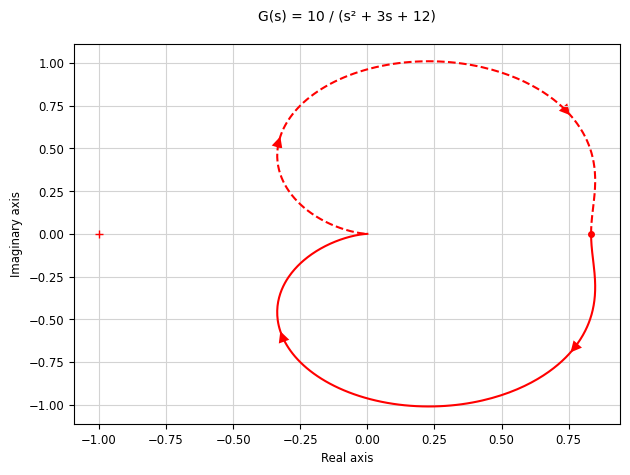

In [3]:
plot_nyquist_from_coeffs(
    numerator=[10],
    denominator=[1, 3, 12],
    title='Nyquist Plot of G(s) = 10 / (s² + 3s + 12)',
    tf_func_string='G(s) = 10 / (s² + 3s + 12)'
)

# Analysis of the Transfer Function: $ G(s) = \frac{6(s+1)}{(s-1)(s-2)} $

### **Transfer Function:**
The transfer function is given as:

$$
G(s) = \frac{6(s+1)}{(s-1)(s-2)}
$$

### **Step 1: Poles and Zeros**
- **Zero**: The system has a zero at $ s = -1 $, as indicated by the factor $ (s+1) $ in the numerator.
- **Poles**: The system has poles at $ s = 1 $ and $ s = 2 $, from the factors $ (s-1) $ and $ (s-2) $ in the denominator.

### **Step 2: Stability**
- The **poles** at $ s = 1 $ and $ s = 2 $ are in the **right half of the complex plane** (i.e., positive real parts).
- Therefore, the system has **right-half-plane poles** and is **unstable**.

### **Step 3: Nyquist Plot Behavior**
- According to the **Nyquist Criterion**, for a system with **right-half-plane poles**, the Nyquist plot will **encircle** the critical point $ -1 $ (in the complex plane).
- This indicates that the system is **unstable**, as multiple encirclements of $ -1 $ are associated with instability.

### **Nyquist Criterion and Encirclements**
The Nyquist Criterion is used to determine the stability of a closed-loop system based on the open-loop transfer function. The formula is:

$$
N = P - Z
$$

Where:
- $ N $ is the number of encirclements of $ -1 $ by the Nyquist plot.
- $ P $ is the number of poles of the open-loop transfer function in the right half-plane (RHP).
- $ Z $ is the number of zeros of the closed-loop transfer function in the right half-plane (RHP).

In this system:
- **Poles ($P$)**: There are 2 poles in the right half-plane at $ s = 1 $ and $ s = 2 $.
- **Zeros ($Z$)**: There are no zeros in the right half-plane (only one zero at $ s = -1 $, which is in the left half-plane).

Thus, using the Nyquist criterion:

$$
N = P - Z = 2 - 0 = 2
$$

This means the Nyquist plot will encircle the point $ -1 $ **twice**, confirming the system is **unstable**.

### **Conclusion:**
- The transfer function:

$$
G(s) = \frac{6(s+1)}{(s-1)(s-2)}
$$

represents an **unstable system** because it has **right-half-plane poles** at $ s = 1 $ and $ s = 2 $.
- The **Nyquist plot** for this system will show **multiple encirclements of $ -1 $**, confirming the system's instability.
- Using the Nyquist criterion, we calculated that the number of encirclements of $ -1 $ is **2**, which further confirms the system is unstable.



Transfer Function: G(s) = G(s) = 6 (s+1) / (s² - 3s + 2)
Zeros: [-1.+0.j]
Poles: [2.+0.j 1.+0.j]
Number of Zeros: 1
Number of Poles: 2
Error generating Nyquist plot: cannot unpack non-iterable int object


c:\Users\minip\AppData\Local\Programs\Python\Python311\Lib\site-packages\control\freqplot.py:1799: FutureWarning: nyquist_plot() return value of count[, contour] is deprecated; use nyquist_response()
  warnings.warn(


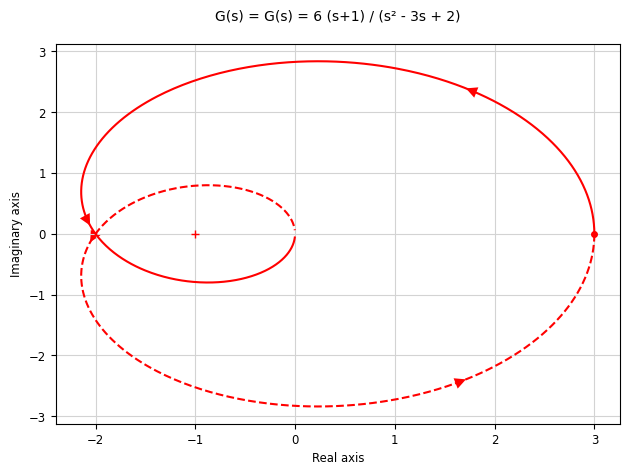

In [4]:
plot_nyquist_from_coeffs(
    numerator=[6, 6],
    denominator=[1, -3, 2],
    title='Nyquist Plot of G(s) = 6 (s+1) / (s² - 3s + 2)',
    tf_func_string='G(s) = G(s) = 6 (s+1) / (s² - 3s + 2)'
)